In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from lib import *
from svm import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
data, lable  = load_train()
train_data, train_lable, validation_data, validation_lable = shuffleData(data, lable)
print "train data: ", train_data.shape
print "train lable: ", train_lable.shape
print "validation data: ", validation_data.shape
print "validation lable: ", validation_lable.shape

train data:  (3366L, 16L)
train lable:  (3366L,)
validation data:  (380L, 16L)
validation lable:  (380L,)


In [66]:
train_data, train_lable =  load_train("./data/pendigits-train.csv")
print "train data: ", train_data.shape
print "train lable: ", train_lable.shape

train data:  (3746L, 16L)
train lable:  (3746L,)


In [67]:
train_lable_num, alpha_num, b_num = train_0va(train_data, train_lable, max_passes=10, kernel=kernel_gaussian, max_iter=3,
                                             validation_data = validation_data, validation_lable = validation_lable )

Now doing number: 0, there is 383 of them
now ir = 1; Train Correct = 0.10224239188467699, validation Correct = 0.08421052631578947; 
now ir = 2; Train Correct = 1.0, validation Correct = 1.0; 
now ir = 3; Train Correct = 1.0, validation Correct = 1.0; 
Now doing number: 1, there is 390 of them
now ir = 1; Train Correct = 0.10411105178857448, validation Correct = 0.1; 
now ir = 2; Train Correct = 0.9863854778430325, validation Correct = 0.9789473684210527; 
now ir = 3; Train Correct = 0.99572877736252, validation Correct = 0.9973684210526316; 
Now doing number: 2, there is 392 of them
now ir = 1; Train Correct = 0.10464495461825948, validation Correct = 0.09210526315789473; 
now ir = 2; Train Correct = 0.9826481580352376, validation Correct = 0.9894736842105263; 
now ir = 3; Train Correct = 0.9829151094500801, validation Correct = 0.9868421052631579; 
Now doing number: 3, there is 370 of them
now ir = 1; Train Correct = 0.09877202349172451, validation Correct = 0.11842105263157894; 
no

Number is :  1.0
predict:  1


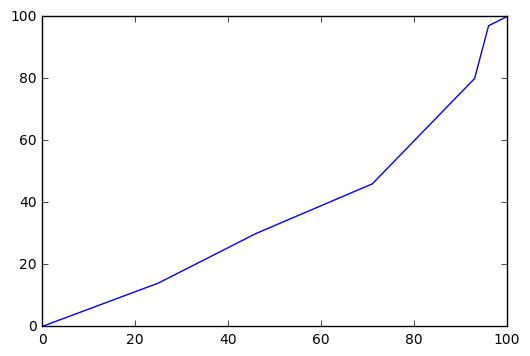

In [12]:
# example visual test
num = 48
visualize(validation_data[num,:],validation_lable[num] )
number = number_predict(validation_data[num,:], train_data, train_lable_num, alpha_num, b_num, kernel_gaussian)
print "predict: ", number


In [68]:
# final result
validation_correct_rate(validation_data, validation_lable, train_data, train_lable_num, alpha_num, b_num, kernel_gaussian)

0.9947368421052631

In [76]:
# predict

test_data  = load_test("./data/pendigits-test-nolabels.csv")
print "test data: ", test_data.shape
number = np.zeros(len(test_data))
for i in range(len(test_data)):
    number[i] = int(number_predict(test_data[i, :], train_data, train_lable_num, alpha_num, b_num, kernel_gaussian))
number = number.astype(int)
np.savetxt('prediction.txt', number,fmt='%i')

(3746L, 16L)
test data:  (3746L, 16L)


Now doing number: 0, there is 351 of them
(1L, 15L)
1.00257365129
Number is :  0.0
Now doing number: 1, there is 352 of them
(1L, 38L)
0.961353234097
Number is :  1.0
Now doing number: 2, there is 357 of them
(1L, 23L)
1.00024145654
Number is :  2.0
Now doing number: 3, there is 325 of them
(1L, 13L)
1.01953427265
Number is :  3.0
Now doing number: 4, there is 350 of them
(1L, 12L)
0.886340845206
Number is :  4.0
Now doing number: 5, there is 345 of them
(1L, 9L)
1.04652891142
Number is :  5.0
Now doing number: 6, there is 318 of them
(1L, 4L)
1.19526302579
Number is :  6.0
Now doing number: 7, there is 327 of them
(1L, 17L)
1.00050605304
Number is :  7.0
Now doing number: 8, there is 321 of them
(1L, 24L)
0.951602678936
Number is :  8.0
Now doing number: 9, there is 320 of them
(1L, 19L)
0.998591467126
Number is :  9.0


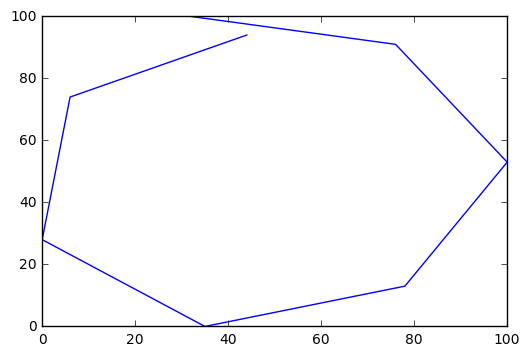

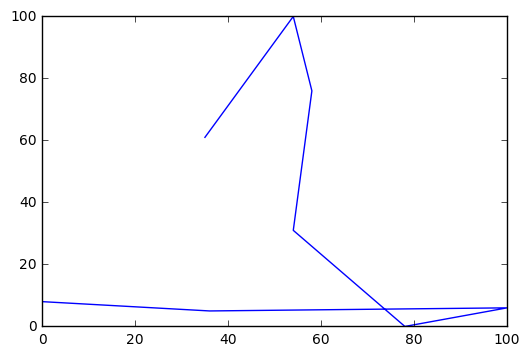

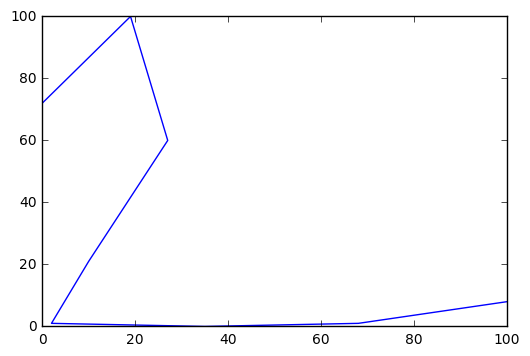

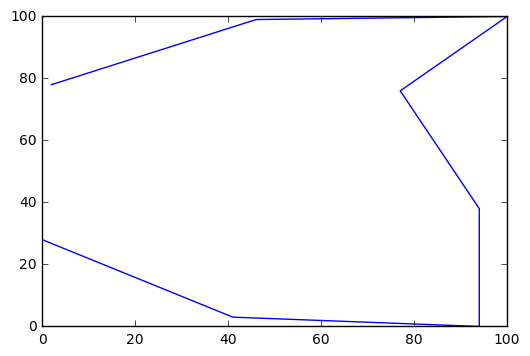

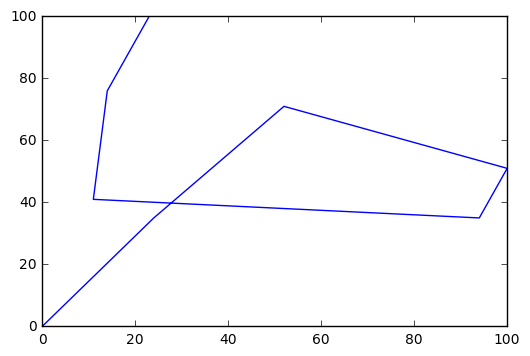

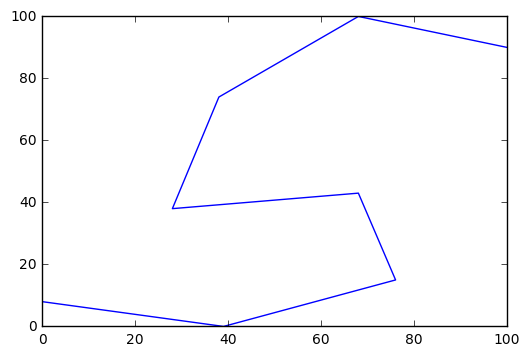

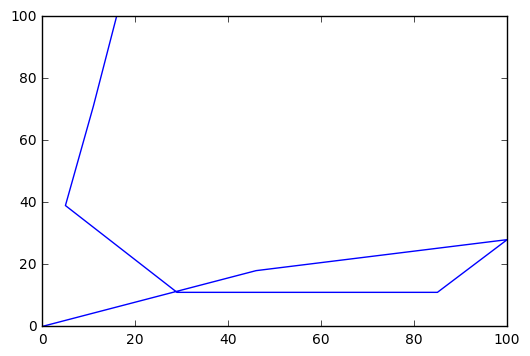

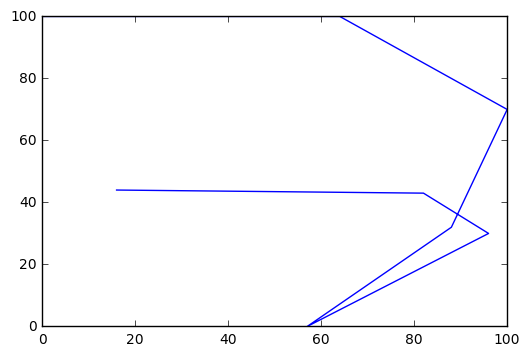

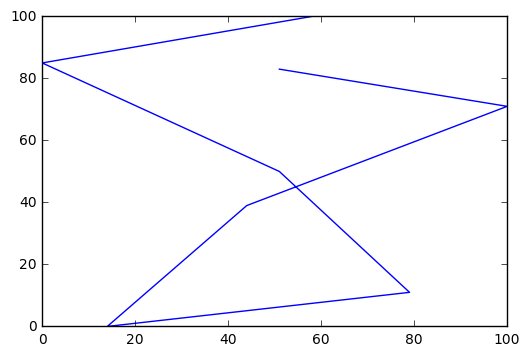

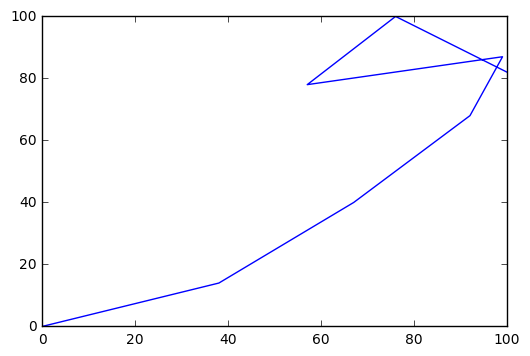

In [59]:
# support vector
for i in range (10):        
    lable_one = np.copy(train_lable)
    lable_one[train_lable == i] = 1
    lable_one[train_lable != i] = -1    
    print "Now doing number: %i, there is %i of them" %(i, (train_lable == i).sum())
    alpha_one, b_one = alpha_num[i], b_num[i]
    alphanotzero = np.where(alpha_one > 0.8)                                    
    alphanotzero = np.asarray(alphanotzero)
    print alphanotzero.shape
    index = alphanotzero[0][0]
    print alpha_one[index]
    
    visualize(train_data[index,:],train_lable[index] )
    plt.figure()

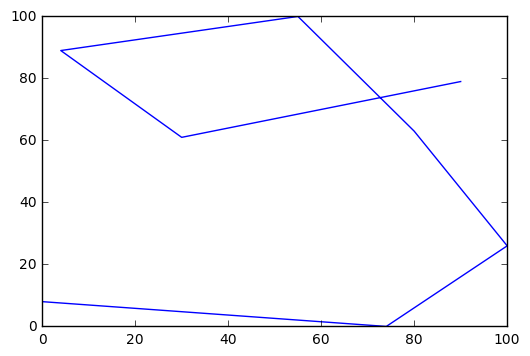

In [80]:
visualize(test_data[3712,:])
